In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_full = pd.read_csv('../reports/result_df.csv')
df_full['name'] = df_full.T.apply(lambda row: '_'.join([str(x) for x in row.drop(['num', 'smape', 'mase*'])]))
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

df = df[~df['name'].duplicated(keep='first')]
print(df.shape)

(6103, 12)
(263, 11)
(253, 11)


In [3]:
def add_benchmarks(legend_loc=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 250.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 250.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc=legend_loc)
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

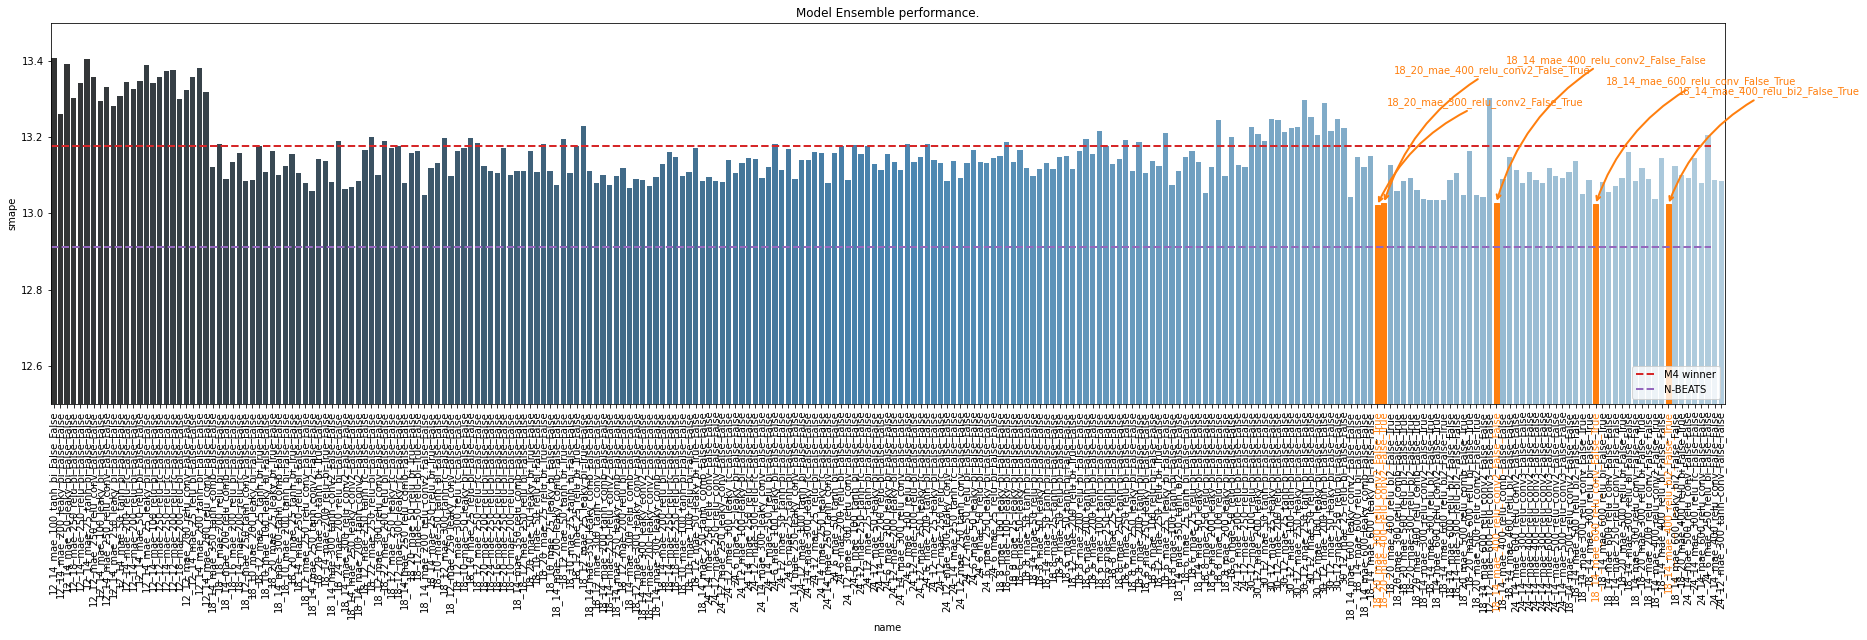

In [4]:
plt.figure(figsize=(30, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

[bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
[label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks(legend_loc='lower right')

## Input size

In [5]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

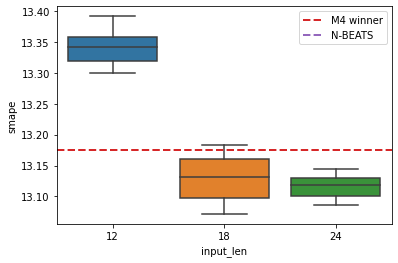

In [6]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [7]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

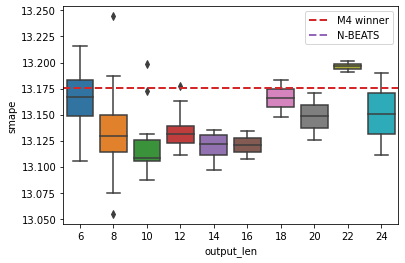

In [8]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [9]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

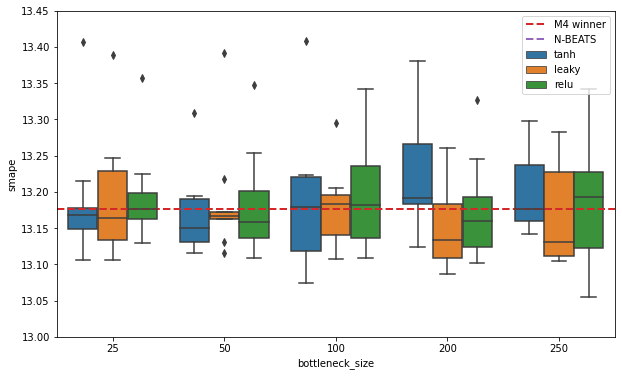

In [10]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## Model type

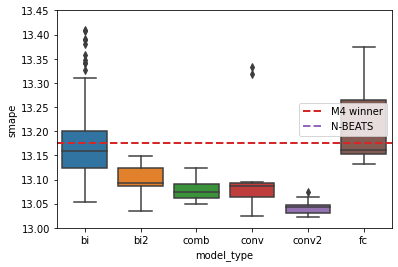

In [11]:
df5 = keep_duplicates(df.drop('name', axis=1), 'model_type')

sns.boxplot(x='model_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

### 5 best models (according to SMAPE)

In [12]:
df.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
4315,18,20,mae,300,relu,conv2,False,True,13.021803,2.658603,18_20_mae_300_relu_conv2_False_True
5838,18,14,mae,400,relu,bi2,False,True,13.023718,2.661005,18_14_mae_400_relu_bi2_False_True
5431,18,14,mae,600,relu,conv,False,True,13.024182,2.663124,18_14_mae_600_relu_conv_False_True
4346,18,20,mae,400,relu,conv2,False,True,13.027056,2.669826,18_20_mae_400_relu_conv2_False_True
4912,18,14,mae,400,relu,conv2,False,False,13.027927,2.668063,18_14_mae_400_relu_conv2_False_False


## Line models

In [13]:
df6 = keep_duplicates(df.drop('name', axis=1), 'line')

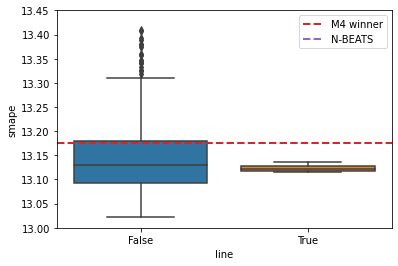

In [14]:
plt.figure(figsize=(6, 4))

sns.boxplot(x='line', y='smape', data=df6)
plt.ylim([13, 13.45])
add_benchmarks()

## 30+ model ensembles

In [15]:
df7 = df.merge(df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1), on='name')

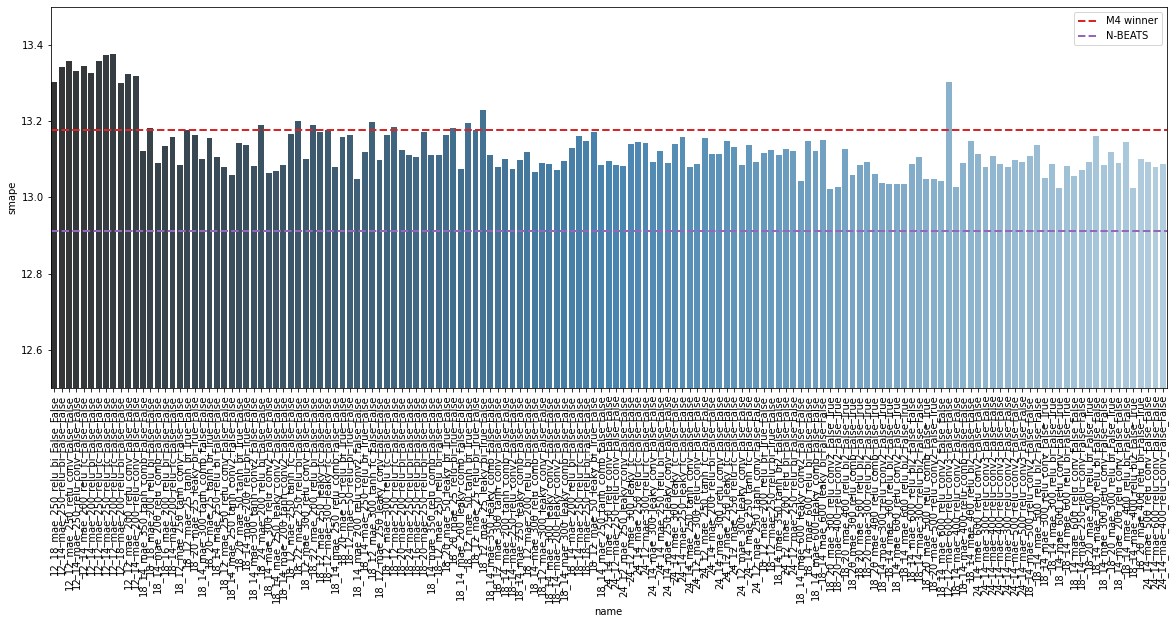

In [16]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df7, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## New

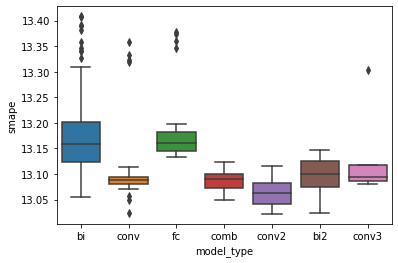

In [17]:
sns.boxplot(x='model_type', y='smape', data=df)

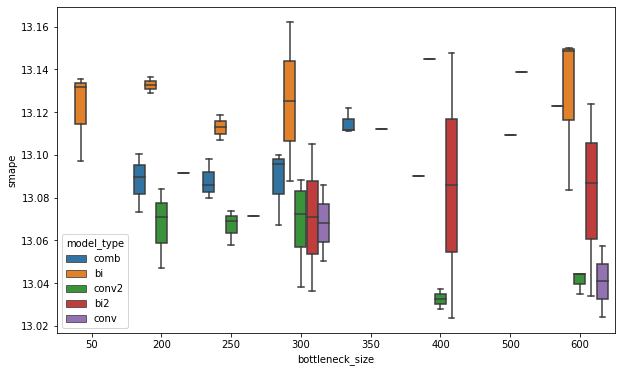

In [18]:
plt.figure(figsize=(10, 6))

df8 = df[(df['input_len'] == 18) & (df['output_len'] == 14) & (df['model_type'] != 'fc')]

sns.boxplot(x='bottleneck_size', y='smape', hue='model_type', data=df8)

### Augmentation

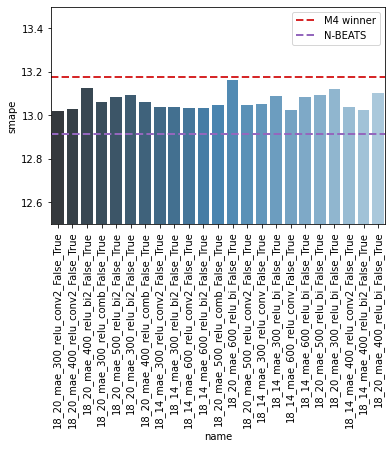

In [19]:
sns.barplot(x='name', y='smape', data=df[df['aug'] == True], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

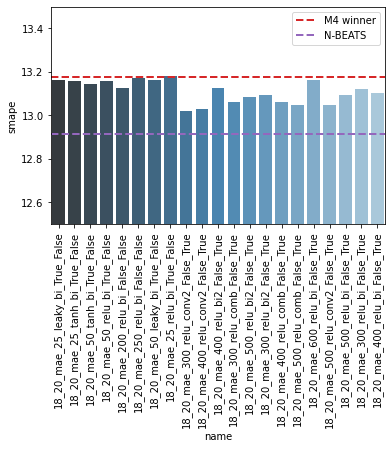

In [20]:
sns.barplot(x='name', y='smape', data=df[df['output_len'] == 20], palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

In [21]:
df[(df['aug'] == True) & (df['output_len'] != 20)]

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
4542,18,14,mae,300,relu,conv2,False,True,13.038303,2.672894,18_14_mae_300_relu_conv2_False_True
4576,18,14,mae,300,relu,bi2,False,True,13.036567,2.667186,18_14_mae_300_relu_bi2_False_True
4578,18,14,mae,600,relu,conv2,False,True,13.034880,2.662831,18_14_mae_600_relu_conv2_False_True
4616,18,14,mae,600,relu,bi2,False,True,13.034002,2.666516,18_14_mae_600_relu_bi2_False_True
5341,18,14,mae,300,relu,conv,False,True,13.050187,2.678155,18_14_mae_300_relu_conv_False_True
5400,18,14,mae,300,relu,bi,False,True,13.087792,2.683103,18_14_mae_300_relu_bi_False_True
5431,18,14,mae,600,relu,conv,False,True,13.024182,2.663124,18_14_mae_600_relu_conv_False_True
5462,18,14,mae,600,relu,bi,False,True,13.083751,2.684029,18_14_mae_600_relu_bi_False_True
5776,18,14,mae,400,relu,conv2,False,True,13.037284,2.670705,18_14_mae_400_relu_conv2_False_True
5838,18,14,mae,400,relu,bi2,False,True,13.023718,2.661005,18_14_mae_400_relu_bi2_False_True


In [22]:
df9 = df[(df['output_len'] == 14) & 
         (df['input_len'] == 18) & 
         (df['bottleneck_activation'] == 'relu') & 
         ((df['bottleneck_size'] == 300) | (df['bottleneck_size'] == 600)) & 
         ((df['model_type'] == 'conv2') | (df['model_type'] == 'bi2' ) | (df['model_type'] == 'bi') | (df['model_type'] == 'conv' ))]

In [23]:
df9[df9['model_type'] == 'conv']

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
5341,18,14,mae,300,relu,conv,False,True,13.050187,2.678155,18_14_mae_300_relu_conv_False_True
5431,18,14,mae,600,relu,conv,False,True,13.024182,2.663124,18_14_mae_600_relu_conv_False_True
5493,18,14,mae,600,relu,conv,False,False,13.057557,2.677381,18_14_mae_600_relu_conv_False_False
5679,18,14,mae,300,relu,conv,False,False,13.086149,2.682660,18_14_mae_300_relu_conv_False_False


In [33]:
df9

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
1094,18,14,mae,300,relu,conv2,False,False,13.063236,2.676662,18_14_mae_300_relu_conv2_False_False
4222,18,14,mae,600,relu,bi,False,False,13.148702,2.693233,18_14_mae_600_relu_bi_False_False
4542,18,14,mae,300,relu,conv2,False,True,13.038303,2.672894,18_14_mae_300_relu_conv2_False_True
4576,18,14,mae,300,relu,bi2,False,True,13.036567,2.667186,18_14_mae_300_relu_bi2_False_True
4578,18,14,mae,600,relu,conv2,False,True,13.034880,2.662831,18_14_mae_600_relu_conv2_False_True
4616,18,14,mae,600,relu,bi2,False,True,13.034002,2.666516,18_14_mae_600_relu_bi2_False_True
4683,18,14,mae,600,relu,bi2,False,False,13.086968,2.673406,18_14_mae_600_relu_bi2_False_False
4714,18,14,mae,300,relu,bi2,False,False,13.105067,2.689629,18_14_mae_300_relu_bi2_False_False
4853,18,14,mae,600,relu,conv2,False,False,13.044398,2.668917,18_14_mae_600_relu_conv2_False_False
5341,18,14,mae,300,relu,conv,False,True,13.050187,2.678155,18_14_mae_300_relu_conv_False_True


In [41]:
for i in range(len(df9)):
    print('{:<38} {:.6f}'.format(df9['name'].iloc[i], df9['smape'].iloc[i]))

18_14_mae_300_relu_conv2_False_False   13.063236
18_14_mae_600_relu_bi_False_False      13.148702
18_14_mae_300_relu_conv2_False_True    13.038303
18_14_mae_300_relu_bi2_False_True      13.036567
18_14_mae_600_relu_conv2_False_True    13.034880
18_14_mae_600_relu_bi2_False_True      13.034002
18_14_mae_600_relu_bi2_False_False     13.086968
18_14_mae_300_relu_bi2_False_False     13.105067
18_14_mae_600_relu_conv2_False_False   13.044398
18_14_mae_300_relu_conv_False_True     13.050187
18_14_mae_300_relu_bi_False_True       13.087792
18_14_mae_600_relu_conv_False_True     13.024182
18_14_mae_600_relu_bi_False_True       13.083751
18_14_mae_600_relu_conv_False_False    13.057557
18_14_mae_300_relu_bi_False_False      13.162402
18_14_mae_300_relu_conv_False_False    13.086149


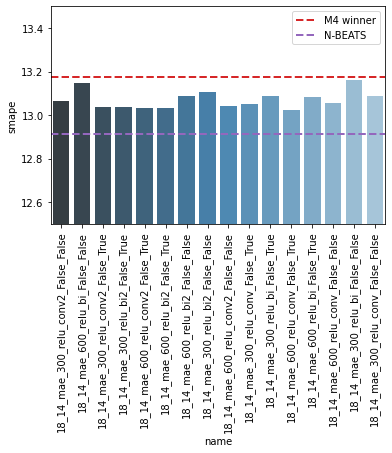

In [25]:
sns.barplot(x='name', y='smape', data=df9, palette='Blues_d')
plt.ylim([12.5, 13.5])
plt.xticks(rotation=90)

add_benchmarks()

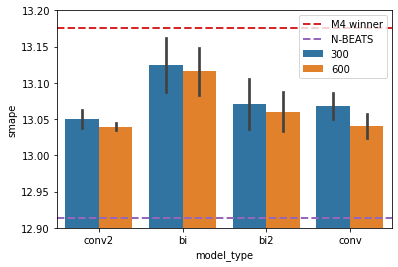

In [43]:
sns.barplot(x='model_type', y='smape', hue='bottleneck_size', data=df9)
plt.ylim([12.9, 13.2])

add_benchmarks()

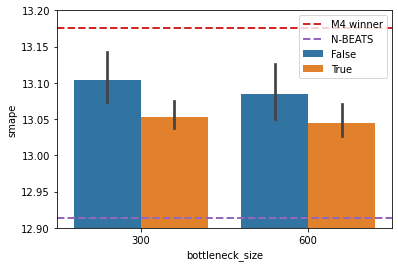

In [30]:
sns.barplot(x='bottleneck_size', y='smape', hue='aug', data=df9)
plt.ylim([12.9, 13.2])

add_benchmarks()

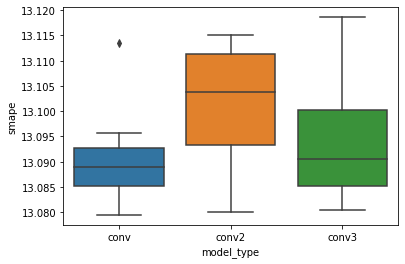

In [31]:
sns.boxplot(x='model_type', y='smape', data=df[(df['model_type'].apply(lambda x: 'conv' in x)) & (df['input_len'] == 24)])